In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

vdfx = pd.read_csv("./catapult_dct_area.csv", index_col=0)
cdfx = pd.read_csv("./catapult_dct_latency.csv", index_col=0)
cdfx['throughput'] = cdfx['obj1'].min()*1/cdfx['obj1']
vdfx['throughput'] = cdfx['obj1'].min()*1/vdfx['obj1']
cdfx['ff_inv'] = 1/cdfx['ff']
vdfx['ff_inv'] = 1/vdfx['ff']
cdfx['lut_inv'] = 1/cdfx['lut']
vdfx['lut_inv'] = 1/vdfx['lut']
cdfx['1/obj2'] = vdfx['obj2'].min()*1/cdfx['obj2']
vdfx['1/obj2'] = vdfx['obj2'].min()*1/vdfx['obj2']
cdfx['clbUtil'] = cdfx['obj2']/147780
vdfx['clbUtil'] = vdfx['obj2']/147780
# drop columns, regularize knobs  
cdfx['mem_partition_size1'] = cdfx['knob_array_partition2']
vdfx['mem_partition_size1'] = vdfx['knob_array_partition2']
cdfx['mem_partition_size2'] = cdfx['knob_array_partition1']
vdfx['mem_partition_size2'] = vdfx['knob_array_partition1']
cdfx = cdfx.drop(columns=['knob_I_B'])
cdfx = cdfx.drop(columns=['knob_array_partition1'])
cdfx = cdfx.drop(columns=['knob_array_partition2'])                                
vdfx = vdfx.drop(columns=['knob_I_B'])
vdfx = vdfx.drop(columns=['knob_array_partition1'])
vdfx = vdfx.drop(columns=['knob_array_partition2'])                                

Text(0.5, 1.0, 'Catapult DCT Design Space')

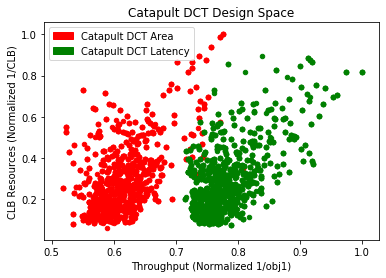

In [5]:
ax1 = vdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='r')
ax = cdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='g', ax=ax1)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Catapult DCT Area')
green_data = mpatches.Patch(color='green', label='Catapult DCT Latency')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput (Normalized 1/obj1)')
plt.ylabel('CLB Resources (Normalized 1/CLB)')
plt.title("Catapult DCT Design Space")

In [6]:
print("~~~~~~~~~~~ Area Optimized Designs Averages ~~~~~~~~~~~~\n")
print(cdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\n~~~~~~~~~~~ Latency Optimized Designs Averages ~~~~~~~~~~~~\n")
print(vdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~ Area Optimized Designs Averages ~~~~~~~~~~~~

knob_blockdim_x        3.764305e+00
knob_blockdim_y        3.312443e+00
knob_unroll_dct        3.295640e+00
knob_unroll_width      2.964124e+00
knob_unroll_height     2.960490e+00
obj1                   1.533566e+00
obj2                   3.448847e+02
lut                    1.745068e+03
ff                     3.450109e+02
dsp                    1.000000e+00
bram                   0.000000e+00
throughput             7.833353e-01
ff_inv                 3.450556e-03
lut_inv                7.864147e-04
1/obj2                 2.948359e-01
clbUtil                2.333771e-03
mem_partition_size1    2.490963e+06
mem_partition_size2    2.289737e+00
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~ Latency Optimized Designs Averages ~~~~~~~~~~~~

knob_blockdim_x        3.784932e+00
knob_blockdim_y        3.284018e+00
knob_unroll_dct        3.293151e+00
knob_unroll_width      2.944749e+00
knob_unroll_height     2.97442

In [7]:
cdfx = cdfx.reset_index(drop=True)
vdfx = vdfx.reset_index(drop=True)
cv_df = pd.merge(cdfx, vdfx, on=['knob_blockdim_x','knob_blockdim_y','knob_unroll_dct','knob_unroll_width', 'knob_unroll_height', 'mem_partition_size2'], how='inner')
cv_df.count()


knob_blockdim_x          2181
knob_blockdim_y          2181
knob_unroll_dct          2181
knob_unroll_width        2181
knob_unroll_height       2181
obj1_x                   2181
obj2_x                   2181
lut_x                    2181
ff_x                     2181
dsp_x                    2181
bram_x                   2181
throughput_x             2181
ff_inv_x                 2181
lut_inv_x                2181
1/obj2_x                 2181
clbUtil_x                2181
mem_partition_size1_x    2181
mem_partition_size2      2181
obj1_y                   2181
obj2_y                   2181
lut_y                    2181
ff_y                     2181
dsp_y                    2181
bram_y                   2181
throughput_y             2181
ff_inv_y                 2181
lut_inv_y                2181
1/obj2_y                 2181
clbUtil_y                2181
mem_partition_size1_y    2181
dtype: int64

(0, 1)

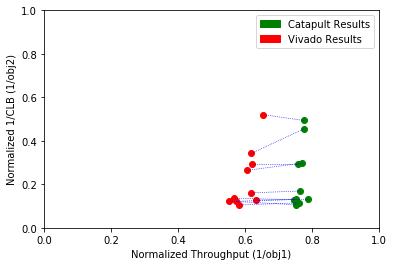

In [8]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample['1/obj2_x'], x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample['1/obj2_y'], x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['1/obj2_x'], row['1/obj2_y']],'b:',linewidth=0.7)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
plt.ylim(0, 1)
plt.xlim(0, 1)

(0, 0.003)

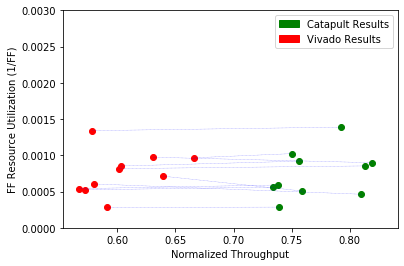

In [9]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample.lut_inv_x, x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample.lut_inv_y, x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['lut_inv_x'], row['lut_inv_y']],'b:',linewidth=0.3)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput')
plt.ylabel('FF Resource Utilization (1/FF)')
plt.ylim(0, 0.003)